<a href="https://www.kaggle.com/code/finnheaslop/imdb-top-work-in-progress?scriptVersionId=110083327" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-250-movies/imdb_top250_movies.csv


In [2]:
df =pd.read_csv('/kaggle/input/imdb-top-250-movies/imdb_top250_movies.csv')

In [3]:
df.head(5)

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
1,1,2,The Godfather,1972,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",tt0068646,movie,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com
2,2,3,The Godfather: Part II,1974,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",tt0071562,movie,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/
3,3,4,The Dark Knight,2008,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"1,802,351",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/
4,4,5,12 Angry Men,1957,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"494,215",tt0050083,movie,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men


In [4]:
df.isnull().sum()

Unnamed: 0      0
Num             0
Title           0
Year            0
Released        2
Runtime         0
Genre           0
Director        0
Writer          1
Actors          0
Plot            0
Language        0
Country         0
Awards          5
Metascore      73
imdbRating      0
imdbVotes       0
imdbID          0
Type            0
DVD             3
BoxOffice     175
Production      0
Website       119
dtype: int64

In [5]:
df['Genre'].unique()

array(['Crime, Drama', 'Action, Crime, Drama',
       'Biography, Drama, History', 'Adventure, Drama, Fantasy', 'Drama',
       'Comedy, Drama, Romance', 'Action, Adventure, Fantasy',
       'Action, Adventure, Sci-Fi', 'Action, Sci-Fi',
       'Crime, Drama, Mystery', 'Drama, Family, Fantasy',
       'Crime, Drama, Thriller', 'Drama, War', 'Adventure, Drama, Sci-Fi',
       'Comedy, Drama, Family', 'Drama, Romance, War',
       'Crime, Drama, Fantasy', 'Horror, Mystery, Thriller',
       'Action, Adventure', 'Biography, Drama, Music',
       'Mystery, Thriller', 'Drama, Music', 'Action, Sci-Fi, Thriller',
       'Adventure, Comedy, Sci-Fi', 'Action, Adventure, Drama',
       'Animation, Adventure, Drama', 'Drama, Mystery, Sci-Fi',
       'Comedy, Drama, War', 'Drama, Film-Noir', 'Horror, Sci-Fi',
       'Comedy', 'Drama, Western', 'Drama, Horror', 'Action, Thriller',
       'Animation, Adventure, Family', 'Drama, Romance', 'Drama, Mystery',
       'Action, Adventure, Mystery', 'Myster

In [6]:
df['Year'].unique()

array([1994, 1972, 1974, 2008, 1957, 1993, 2003, 1999, 2001, 1980, 2010,
       2002, 1975, 1990, 1977, 1995, 1946, 1991, 1998, 1931, 2014, 1936,
       1942, 1960, 1981, 1954, 2006, 1985, 2000, 1979, 1940, 1950, 1964,
       2012, 1984, 1986, 1941, 1959, 1958, 1983, 1992, 1944, 1962, 1921,
       1971, 2004, 1952, 1976, 1973, 1968, 1987, 2017, 2009, 1997, 1948,
       1989, 2005, 1949, 1961, 1963, 1988, 1925, 1939, 1926, 2015, 2016,
       1982, 2011, 2013, 1996, 1978, 1967, 1934, 2007, 1969, 1945, 1953,
       1947, 1966, 1951, 1955, 1930, 1935, 1956, 1970])

In [7]:
df.groupby('Year')['Year'].agg('count').sort_values(ascending = True)

Year
1921    1
1985    1
1956    1
1955    1
1978    1
       ..
1998    6
1999    7
2014    7
2015    7
1995    8
Name: Year, Length: 85, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

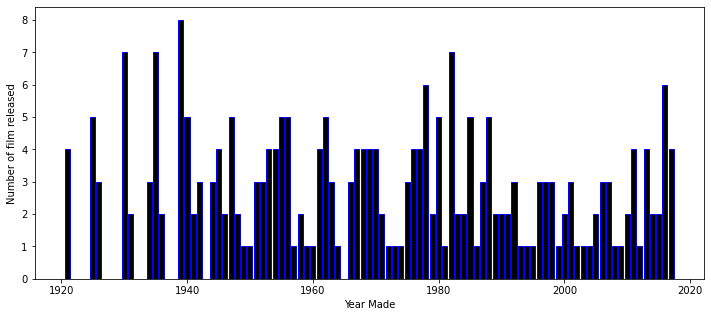

In [9]:
film_release = df.groupby('Year')['Year'].agg('count')
year = df['Year'].unique()


plt.figure(figsize=(12,5))
plt.bar(year,film_release, color='black',  edgecolor='blue')
plt.xlabel("Year Made")
plt.ylabel("Number of film released")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   Num         250 non-null    int64  
 2   Title       250 non-null    object 
 3   Year        250 non-null    int64  
 4   Released    248 non-null    object 
 5   Runtime     250 non-null    object 
 6   Genre       250 non-null    object 
 7   Director    250 non-null    object 
 8   Writer      249 non-null    object 
 9   Actors      250 non-null    object 
 10  Plot        250 non-null    object 
 11  Language    250 non-null    object 
 12  Country     250 non-null    object 
 13  Awards      245 non-null    object 
 14  Metascore   177 non-null    float64
 15  imdbRating  250 non-null    float64
 16  imdbVotes   250 non-null    object 
 17  imdbID      250 non-null    object 
 18  Type        250 non-null    object 
 19  DVD         247 non-null    o

In [11]:
df.describe()

,Unnamed: 0,Num,Year,Metascore,imdbRating
count,250.000000,250.000000,250.000000,177.000000,250.000000
mean,124.500000,125.500000,1982.676000,80.045198,8.244000
std,72.312977,72.312977,24.809212,11.030340,0.245735
min,0.000000,1.000000,1921.000000,53.000000,8.000000
25%,62.250000,63.250000,1961.250000,72.000000,8.100000
50%,124.500000,125.500000,1988.000000,81.000000,8.200000
75%,186.750000,187.750000,2003.000000,89.000000,8.375000
max,249.000000,250.000000,2017.000000,100.000000,9.300000


In [12]:
df.columns

Index(['Unnamed: 0', 'Num', 'Title', 'Year', 'Released', 'Runtime', 'Genre',
       'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD',
       'BoxOffice', 'Production', 'Website'],
      dtype='object')

In [13]:
Top = df[['Title', 'Metascore']].sort_values(by="Metascore",ascending=False)
Top = Top.head(20)
Top.head(10)

,Title,Metascore
184,The Wizard of Oz,100.0
28,Casablanca,100.0
1,The Godfather,100.0
64,Lawrence of Arabia,100.0
56,Citizen Kane,100.0
194,The Night of the Hunter,99.0
118,Gone with the Wind,97.0
30,Psycho,97.0
157,12 Years a Slave,96.0
46,Dr. Strangelove or: How I Learned to Stop Worr...,96.0


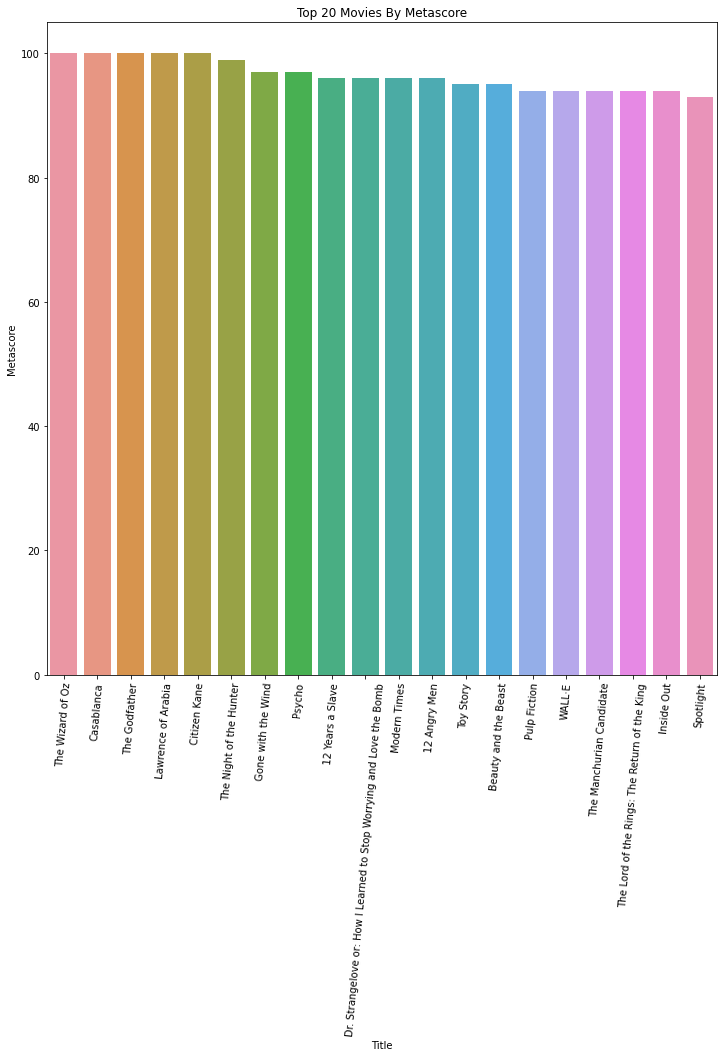

In [14]:
plt.figure(figsize=(12,12))
graph=sns.barplot(y='Metascore',x='Title',data=Top)
graph.set_title('Top 20 Movies By Metascore')
plt.xticks(rotation=85)
plt.show()

In [15]:
Top.describe()

,Metascore
count,20.000000
mean,96.500000
std,2.481511
min,93.000000
25%,94.000000
50%,96.000000
75%,99.250000
max,100.000000


In [16]:
dramaGenre = df[df['Genre'] == 'Drama']

In [17]:
dramaGenre.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
8,8,9,Fight Club,1999,15 Oct 1999,139 min,Drama,David Fincher,"Chuck Palahniuk (novel), Jim Uhls (screenplay)","Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier",...,Nominated for 1 Oscar. Another 10 wins & 31 no...,66.0,8.8,"1,458,676",tt0137523,movie,06 Jun 2000,NaN,20th Century Fox,http://www.foxmovies.com/fightclub/
14,14,15,One Flew Over the Cuckoo's Nest,1975,19 Nov 1975,133 min,Drama,Milos Forman,"Lawrence Hauben (screenplay), Bo Goldman (scre...","Michael Berryman, Peter Brocco, Dean R. Brooks...",...,Won 5 Oscars. Another 30 wins & 13 nominations.,80.0,8.7,"729,653",tt0073486,movie,09 Dec 1997,NaN,United Artists,NaN
63,63,64,Requiem for a Dream,2000,15 Dec 2000,102 min,Drama,Darren Aronofsky,"Hubert Selby Jr. (based on the book by), Huber...","Ellen Burstyn, Jared Leto, Jennifer Connelly, ...",...,Nominated for 1 Oscar. Another 33 wins & 62 no...,68.0,8.4,"618,232",tt0180093,movie,22 May 2001,"$2,546,851",Artisan Entertainment,http://www.requiemforadream.com
81,81,82,All About Eve,1950,15 Jan 1951,138 min,Drama,Joseph L. Mankiewicz,Joseph L. Mankiewicz (written for the screen by),"Bette Davis, Anne Baxter, George Sanders, Cele...",...,Won 6 Oscars. Another 17 wins & 17 nominations.,NaN,8.3,"89,890",tt0042192,movie,05 Oct 1999,NaN,20th Century Fox,NaN
85,85,86,Good Will Hunting,1997,09 Jan 1998,126 min,Drama,Gus Van Sant,"Matt Damon, Ben Affleck","Matt Damon, Ben Affleck, Stellan Skarsgård, Jo...",...,Won 2 Oscars. Another 22 wins & 55 nominations.,70.0,8.3,"659,342",tt0119217,movie,08 Dec 1998,NaN,Miramax Films,http://www.miramax.com/movie/good-will-hunting/


In [18]:
dramaGenre.describe()

,Unnamed: 0,Num,Year,Metascore,imdbRating
count,19.000000,19.000000,19.000000,14.000000,19.000000
mean,151.263158,152.263158,1989.631579,76.357143,8.189474
std,77.269257,77.269257,19.919869,8.949492,0.230687
min,8.000000,9.000000,1950.000000,62.000000,8.000000
25%,95.000000,96.000000,1975.500000,68.500000,8.000000
50%,170.000000,171.000000,1996.000000,78.500000,8.100000
75%,223.000000,224.000000,2004.000000,83.750000,8.250000
max,249.000000,250.000000,2015.000000,88.000000,8.800000


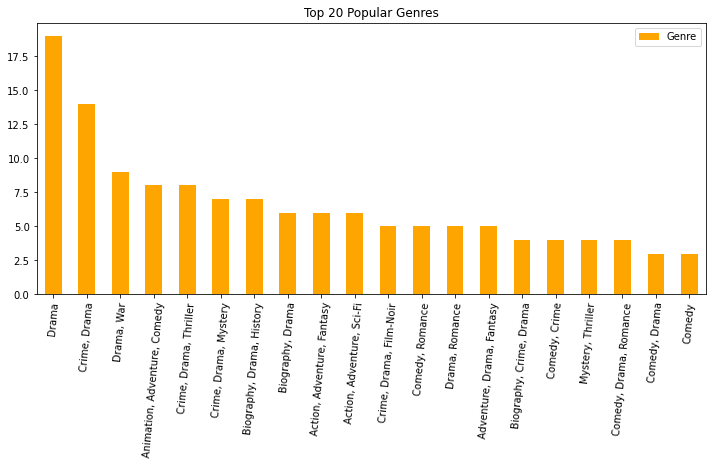

In [19]:
df_count = df[["Genre"]].apply(pd.value_counts)
df_count = df_count.head(20)
df_count.plot(kind="bar", color="Orange", figsize=(12,5))
plt.xticks(rotation = 85)
plt.title("Top 20 Popular Genres")
plt.show()



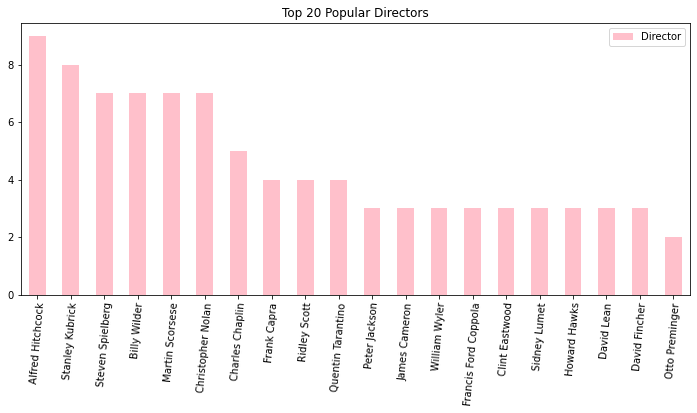

In [20]:
df_count = df[["Director"]].apply(pd.value_counts)
df_count = df_count.head(20)
df_count.plot(kind="bar", color="Pink", figsize=(12,5))
plt.xticks(rotation = 85)
plt.title("Top 20 Popular Directors")
plt.show()


In [21]:
topDramas=dramaGenre[['Title', 'imdbRating']].sort_values(by="imdbRating",ascending=False)
topDramas.head(20)

,Title,imdbRating
8,Fight Club,8.8
14,One Flew Over the Cuckoo's Nest,8.7
63,Requiem for a Dream,8.4
81,All About Eve,8.3
85,Good Will Hunting,8.3
105,Room,8.2
121,Trainspotting,8.2
124,Gran Torino,8.2
189,Who's Afraid of Virginia Woolf?,8.1
192,The Help,8.1


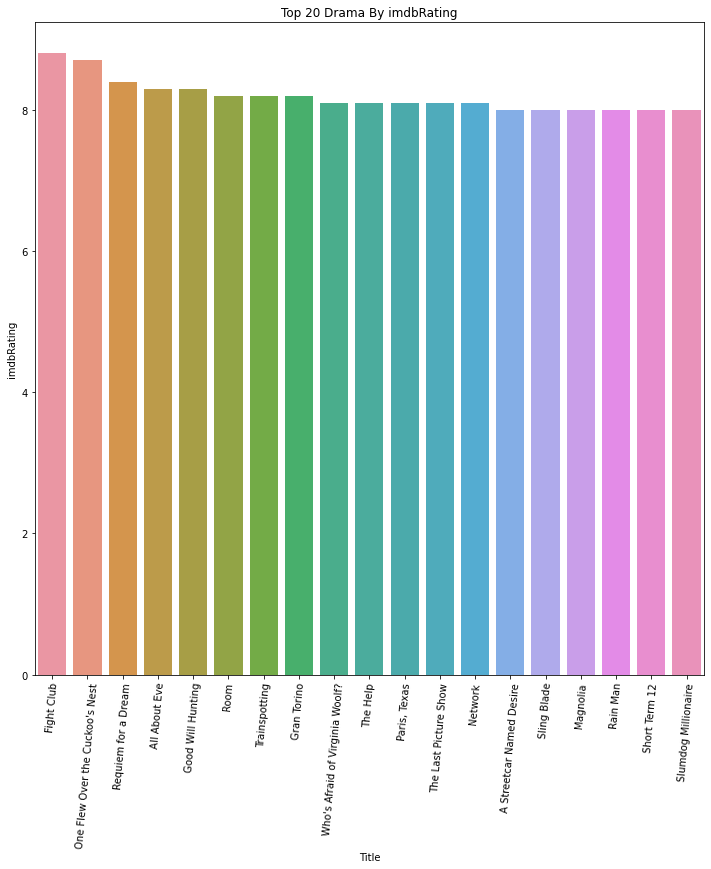

In [22]:
plt.figure(figsize=(12,12))
graph=sns.barplot(y='imdbRating',x='Title',data=topDramas)
graph.set_title('Top 20 Drama By imdbRating')
plt.xticks(rotation=85)
plt.show()